In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import sklearn 
import seaborn as sns 
from scipy.stats import norm

In [2]:
data= pd.read_csv("Aiplane_BlueBook.csv")

In [3]:
data.head()

,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng service ceiling,Eng out service ceiling,...,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll,Gross weight lbs,Empty weight lbs,Length ft/in,Height ft/in,Wing span ft/in,Range N.M.
0,15 AC Sedan,Aeronca,Piston,145,104,91,46,36.0,13000.0,NaN,...,900.0,NaN,1300.0,NaN,2050,1180,25/3,10/3,37/5,370
1,11 CC Super Chief,Aeronca,Piston,85,89,83,44,15.0,12300.0,NaN,...,720.0,NaN,800.0,NaN,1350,820,20/7,8/9,36/1,190
2,7 CCM Champ,Aeronca,Piston,90,90,78,37,19.0,16000.0,NaN,...,475.0,NaN,850.0,NaN,1300,810,21/5,8/7,35/0,210
3,7 DC Champ,Aeronca,Piston,85,88,78,37,19.0,13000.0,NaN,...,500.0,NaN,850.0,NaN,1300,800,21/5,8/7,35/0,210
4,7 AC Champ,Aeronca,Piston,65,83,74,33,14.0,12500.0,NaN,...,632.0,NaN,885.0,NaN,1220,740,21/5,8/9,35/0,175


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    861 non-null    object 
 1   Company                  861 non-null    object 
 2   Engine Type              834 non-null    object 
 3   HP or lbs thr ea engine  834 non-null    object 
 4   Max speed Knots          791 non-null    object 
 5   Rcmnd cruise Knots       811 non-null    object 
 6   Stall Knots dirty        735 non-null    object 
 7   Fuel gal/lbs             807 non-null    float64
 8   All eng service ceiling  780 non-null    float64
 9   Eng out service ceiling  332 non-null    object 
 10  All eng rate of climb    752 non-null    object 
 11  Eng out rate of climb    358 non-null    object 
 12  Takeoff over 50ft        712 non-null    float64
 13  Takeoff ground run       691 non-null    float64
 14  Landing over 50ft        7

In [5]:
data.isna().sum()

Model                        0
Company                      0
Engine Type                 27
HP or lbs thr ea engine     27
Max speed Knots             70
Rcmnd cruise Knots          50
Stall Knots dirty          126
Fuel gal/lbs                54
All eng service ceiling     81
Eng out service ceiling    529
All eng rate of climb      109
Eng out rate of climb      503
Takeoff over 50ft          149
Takeoff ground run         170
Landing over 50ft          149
Landing ground roll        201
Gross weight lbs            31
Empty weight lbs            27
Length ft/in                39
Height ft/in                42
Wing span ft/in             29
Range N.M.                 103
dtype: int64

## Exploratory Data Analysis 

In [16]:
# correlation matrix 
corr_mat=data.corr()
corr_mat

,Fuel gal/lbs,All eng service ceiling,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll
Fuel gal/lbs,1.000000,0.631657,0.750853,0.540894,0.561575,0.628957
All eng service ceiling,0.631657,1.000000,0.789833,0.562244,0.789741,0.815122
Takeoff over 50ft,0.750853,0.789833,1.000000,0.922854,0.834085,0.669618
Takeoff ground run,0.540894,0.562244,0.922854,1.000000,0.725045,0.567918
Landing over 50ft,0.561575,0.789741,0.834085,0.725045,1.000000,0.811998
Landing ground roll,0.628957,0.815122,0.669618,0.567918,0.811998,1.000000


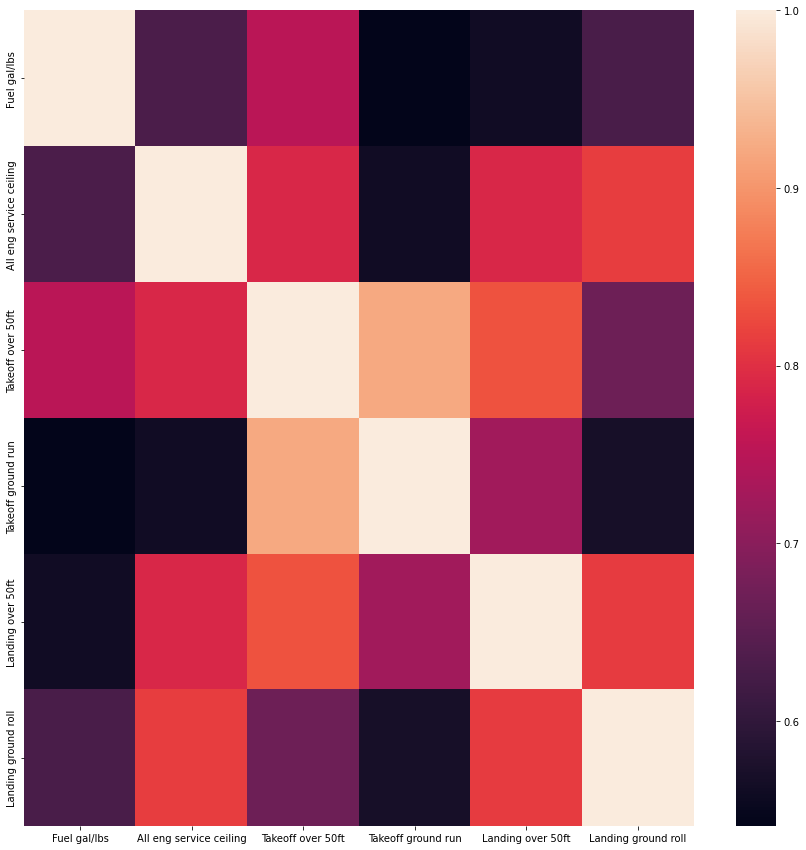

In [17]:
# lets visualise this a little better by plotting it .
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_mat,
            annot=False);

Heatmaps are a great way to visualise correlations between variables in my opinion. We notice here that as the grids get lighter in colour they indicate positive correlation with our target variable and the grids which are dark represent negative correlation with our target variable. a.k.a all engine service sealings

Positive Correlation - positive correlation between two variable suggests that as the independent variable increases our target variable also increases.

Negative Correlation - negative correlation suggests that as our independent variable decreases our target variable increases.

In [26]:
# converting strings to categories 

In [27]:
# Find the Columns which contain strings 
for label,content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Model
Company
Engine Type
HP or lbs thr ea engine
Max speed Knots
Rcmnd cruise Knots
Stall Knots dirty
Eng out service ceiling
All eng rate of climb
Eng out rate of climb
Gross weight lbs
Empty weight lbs
Length ft/in
Height ft/in
Wing span ft/in
Range N.M.


In [30]:
# This will turn all the string values into category values 
for label , content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label]= content.astype("category").cat.as_ordered()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Model                    861 non-null    category
 1   Company                  861 non-null    category
 2   Engine Type              834 non-null    category
 3   HP or lbs thr ea engine  834 non-null    category
 4   Max speed Knots          791 non-null    category
 5   Rcmnd cruise Knots       811 non-null    category
 6   Stall Knots dirty        735 non-null    category
 7   Fuel gal/lbs             807 non-null    float64 
 8   All eng service ceiling  780 non-null    float64 
 9   Eng out service ceiling  332 non-null    category
 10  All eng rate of climb    752 non-null    category
 11  Eng out rate of climb    358 non-null    category
 12  Takeoff over 50ft        712 non-null    float64 
 13  Takeoff ground run       691 non-null    float64 
 14  Landing ov

In [33]:

# under the hood , pandas is treating them like numbers .

In [34]:
# All of our data is now numerical, but we still have a lot of missing data 

In [35]:
data.isnull().sum()/len(data)

Model                      0.000000
Company                    0.000000
Engine Type                0.031359
HP or lbs thr ea engine    0.031359
Max speed Knots            0.081301
Rcmnd cruise Knots         0.058072
Stall Knots dirty          0.146341
Fuel gal/lbs               0.062718
All eng service ceiling    0.094077
Eng out service ceiling    0.614402
All eng rate of climb      0.126597
Eng out rate of climb      0.584204
Takeoff over 50ft          0.173055
Takeoff ground run         0.197445
Landing over 50ft          0.173055
Landing ground roll        0.233449
Gross weight lbs           0.036005
Empty weight lbs           0.031359
Length ft/in               0.045296
Height ft/in               0.048780
Wing span ft/in            0.033682
Range N.M.                 0.119628
dtype: float64

## Filling the missing values 

Filling numeric missing values first! 

In [36]:
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Fuel gal/lbs
All eng service ceiling
Takeoff over 50ft
Takeoff ground run
Landing over 50ft
Landing ground roll


In [37]:
# check for which numeric columns have null values 
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Fuel gal/lbs
All eng service ceiling
Takeoff over 50ft
Takeoff ground run
Landing over 50ft
Landing ground roll


In [38]:
# fill the numeric rows with the median 
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # add a binary column which tells us if the data was missing or not 
            data[label+"_is_missing"] = pd.isnull(content)
            # fill missing numeric value with median 
            data[label]=content.fillna(content.median())

In [39]:
# check if there's any null numeric value 
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Prints out nothing as we just filled out all the missing values with the median values 

## Filling and turning categorical values into numbers

In [40]:
# check for columns which aren't numeric 
for label,content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Model
Company
Engine Type
HP or lbs thr ea engine
Max speed Knots
Rcmnd cruise Knots
Stall Knots dirty
Eng out service ceiling
All eng rate of climb
Eng out rate of climb
Gross weight lbs
Empty weight lbs
Length ft/in
Height ft/in
Wing span ft/in
Range N.M.


In [41]:
for label,content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        
        # add a binary column which tells us if the data was missing or not 
        data[label+"_is_missing"] = pd.isnull(content)
        # turn categories into numbers and add 1
        data[label]= pd.Categorical(content).codes+1

In [42]:
data.head()

,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng service ceiling,Eng out service ceiling,...,Stall Knots dirty_is_missing,Eng out service ceiling_is_missing,All eng rate of climb_is_missing,Eng out rate of climb_is_missing,Gross weight lbs_is_missing,Empty weight lbs_is_missing,Length ft/in_is_missing,Height ft/in_is_missing,Wing span ft/in_is_missing,Range N.M._is_missing
0,32,1,6,19,29,248,25,36.0,13000.0,0,...,False,True,False,True,False,False,False,False,False,False
1,9,1,6,165,260,242,22,15.0,12300.0,0,...,False,True,False,True,False,False,False,False,False,False
2,251,1,6,169,261,241,15,19.0,16000.0,0,...,False,True,False,True,False,False,False,False,False,False
3,252,1,6,165,259,241,15,19.0,13000.0,0,...,False,True,False,True,False,False,False,False,False,False
4,250,1,6,132,257,239,11,14.0,12500.0,0,...,False,True,False,True,False,False,False,False,False,False


In [43]:
data.isna().sum()

Model                                 0
Company                               0
Engine Type                           0
HP or lbs thr ea engine               0
Max speed Knots                       0
Rcmnd cruise Knots                    0
Stall Knots dirty                     0
Fuel gal/lbs                          0
All eng service ceiling               0
Eng out service ceiling               0
All eng rate of climb                 0
Eng out rate of climb                 0
Takeoff over 50ft                     0
Takeoff ground run                    0
Landing over 50ft                     0
Landing ground roll                   0
Gross weight lbs                      0
Empty weight lbs                      0
Length ft/in                          0
Height ft/in                          0
Wing span ft/in                       0
Range N.M.                            0
Fuel gal/lbs_is_missing               0
All eng service ceiling_is_missing    0
Takeoff over 50ft_is_missing          0


Now our data is all numeric and has no missing values in it. Now we can analyse the data well and build a machine learning model 0n it 

In [44]:
# correlation matrix 
corr_mat=data.corr()
corr_mat

,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng service ceiling,Eng out service ceiling,...,Stall Knots dirty_is_missing,Eng out service ceiling_is_missing,All eng rate of climb_is_missing,Eng out rate of climb_is_missing,Gross weight lbs_is_missing,Empty weight lbs_is_missing,Length ft/in_is_missing,Height ft/in_is_missing,Wing span ft/in_is_missing,Range N.M._is_missing
Model,1.000000,0.311535,0.048391,0.012334,-0.040436,-0.009947,-0.087241,0.021881,0.021941,-0.061073,...,0.119769,0.035868,0.120250,-0.014564,0.028160,0.064791,-0.000670,-0.011522,0.026821,0.134378
Company,0.311535,1.000000,-0.050115,-0.128975,-0.015842,-0.090179,-0.041884,-0.079941,-0.059293,-0.040570,...,0.007513,0.008059,0.186245,-0.031291,0.266870,0.081379,0.158485,0.133336,0.271512,0.260021
Engine Type,0.048391,-0.050115,1.000000,0.095155,0.065733,-0.147367,0.149302,-0.533031,-0.621017,-0.189979,...,-0.365224,0.119065,-0.441600,0.153658,-0.488678,-0.120341,-0.394835,-0.374194,-0.499949,-0.254842
HP or lbs thr ea engine,0.012334,-0.128975,0.095155,1.000000,0.351725,0.368554,0.142101,0.039334,0.319408,0.123153,...,0.178078,-0.257703,-0.076085,-0.296094,-0.259374,0.061314,-0.171621,-0.184419,-0.274732,-0.030368
Max speed Knots,-0.040436,-0.015842,0.065733,0.351725,1.000000,0.507235,0.317291,-0.006792,0.327736,0.222582,...,-0.052907,-0.351853,-0.237802,-0.404722,-0.242243,0.022255,-0.253764,-0.260196,-0.267318,-0.077773
Rcmnd cruise Knots,-0.009947,-0.090179,-0.147367,0.368554,0.507235,1.000000,0.183860,0.145653,0.370689,0.267422,...,0.062153,-0.346967,-0.173135,-0.371476,-0.223036,0.037530,-0.215820,-0.225963,-0.213179,-0.110298
Stall Knots dirty,-0.087241,-0.041884,0.149302,0.142101,0.317291,0.183860,1.000000,-0.291398,0.014873,0.235208,...,-0.681304,-0.408391,-0.354282,-0.329024,-0.058269,-0.252626,-0.026444,-0.035668,-0.038985,-0.171820
Fuel gal/lbs,0.021881,-0.079941,-0.533031,0.039334,-0.006792,0.145653,-0.291398,1.000000,0.626051,0.213897,...,0.490351,-0.204212,0.191931,-0.262109,-0.064378,0.016537,-0.072206,-0.075232,-0.062191,-0.048641
All eng service ceiling,0.021941,-0.059293,-0.621017,0.319408,0.327736,0.370689,0.014873,0.626051,1.000000,0.391328,...,0.494353,-0.490660,0.204622,-0.538224,-0.023691,0.144840,-0.050975,-0.063392,-0.037069,0.024893
Eng out service ceiling,-0.061073,-0.040570,-0.189979,0.123153,0.222582,0.267422,0.235208,0.213897,0.391328,1.000000,...,0.070213,-0.802948,-0.117032,-0.727506,-0.110295,-0.020863,-0.138556,-0.144049,-0.118759,-0.105068


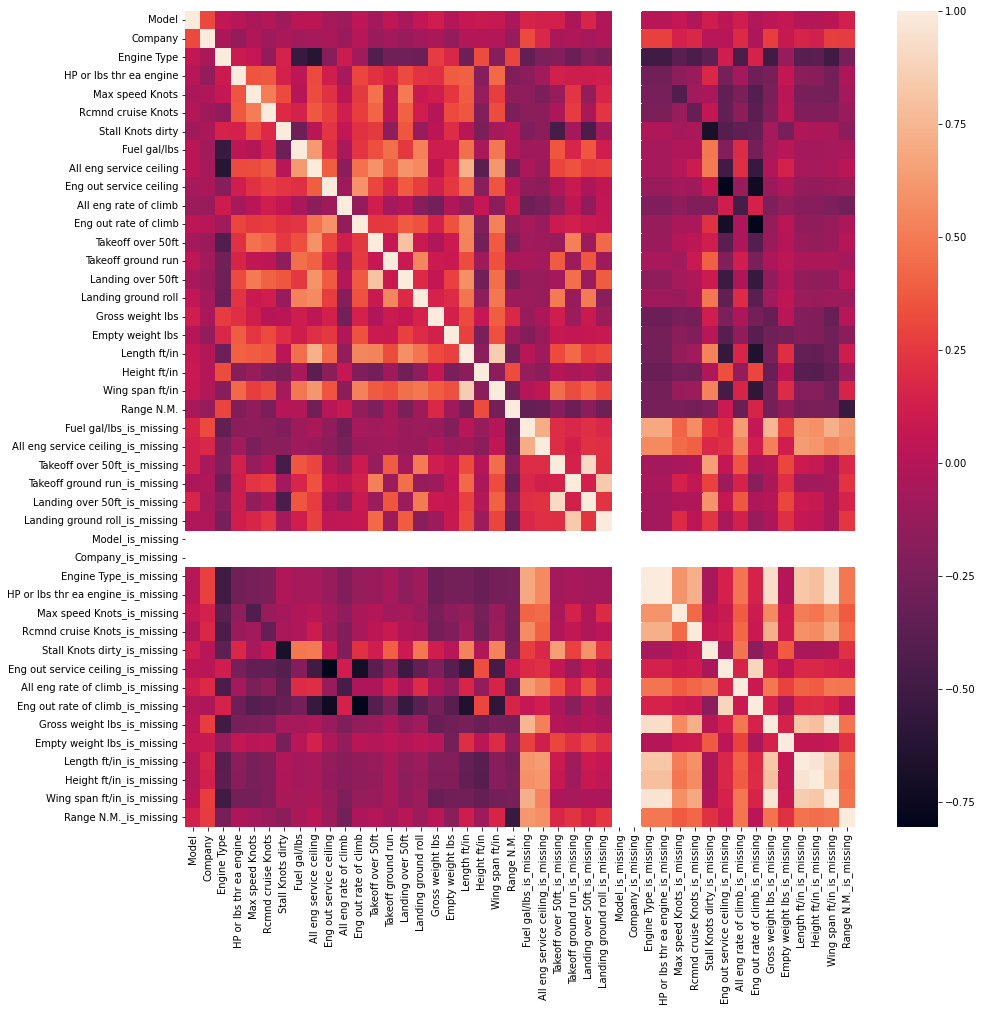

In [45]:
# lets visualise this a little better by plotting it .
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_mat,
            annot=False);

Here we can see that the Engine type, Stall Knots seem to have a negative correlation with The amount of fuel required whereas All engine service ceiling ( when the rate of climb drops below a certain value) , Length and Takeoff Ground run and Range seem to have positive correlation 

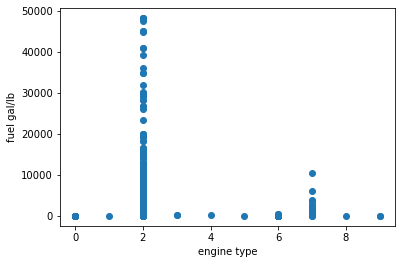

In [50]:
fig,ax = plt.subplots()
ax.scatter(data["Engine Type"],data["Fuel gal/lbs"])
plt.xlabel("engine type")
plt.ylabel("fuel gal/lb");

The one with the longest line is piston engine (2) whereas the second one is Propjet engine(2). 

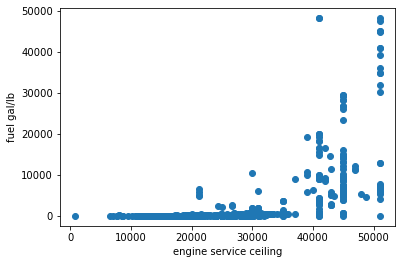

In [53]:
fig,ax = plt.subplots()
ax.scatter(data["All eng service ceiling"],data["Fuel gal/lbs"])
plt.xlabel("engine service ceiling")
plt.ylabel("fuel gal/lb");

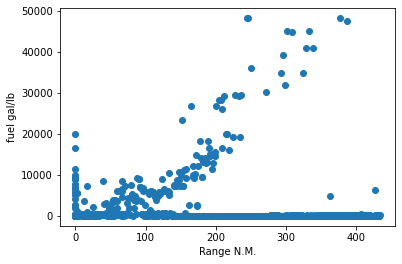

In [54]:
fig,ax = plt.subplots()
ax.scatter(data["Range N.M."],data["Fuel gal/lbs"])
plt.xlabel("Range N.M.")
plt.ylabel("fuel gal/lb");

## Modelling a Machine Learining Model to predict optimized fuel 

Here we discovered some attributes such as engine type, Range, All engine service ceiling, Horse Power, Length of the aircraft etc which are important for predicting the optimum fuel required by the aircraft 

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [59]:
# instantiate our model 
model=RandomForestRegressor(n_jobs=-1,
                            random_state=42)

In [60]:
# splitting the Data into x & y 
x = data.drop("Fuel gal/lbs",axis=1)
y = data["Fuel gal/lbs"]

# splitting the data 

x_train,x_valid,y_train,y_valid=train_test_split(x,
                                                 y, 
                                                 test_size=.02)

In [61]:
model.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [62]:
model.score(x_valid,y_valid)

0.9287035110320534

In [65]:
# build an evaluation function
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def rmse(y_true,y_preds):
    """
    Calculates Root Mean Squared Error between the actual and the predicted labels.
    
    """
    return np.sqrt(mean_squared_error(y_true,y_preds))

## create a function to evaluate models on a few different levels 

def show_scores(model):
    train_preds=model.predict(x_train)
    val_preds=model.predict(x_valid)
    scores = {
              "Training r^2":r2_score(y_train,train_preds),
              "Valid r^2":r2_score(y_valid,val_preds)}
    return scores 

In [66]:
show_scores(model)

{'Training r^2': 0.9951461728568796, 'Valid r^2': 0.9287035110320534}

## Hyperparameter tuning with Randomized Search CV 

In [67]:
from sklearn.model_selection import RandomizedSearchCV
# different RandomForestRegressor Hyperparameters 
rf_grid = {"n_estimators":np.arange(10,100,10),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2),
           "max_features":[0.5,1,"sqrt","auto"]}

#Instantiate RandomizedSearchCV model 
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                  random_state=42),
                            param_distributions=rf_grid,
                            n_iter=2,
# i only did 2 for this case, if you have more time or computing power in your laptop, set it to a higher value ex(100).
                            cv=5,
                            verbose=True)
#fit the RandomizedSearchCV model
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.5s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [68]:
# Search for the best Hyperparameters 
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_features': 0.5,
 'max_depth': None}

In [69]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training r^2': 0.9378683039855991, 'Valid r^2': 0.8506361191634749}

Note As we see that our score has worsened , but that's okay because we ran this code for only 2 iterations , if we do it for a 100 iterations , we'll find better hyperparameters 

## Feature Importance 

Feature importance seeks to figure out different attributes of the data were most important when it comes to Predicting the target variable . a.k.a Fuel

In [71]:
model.feature_importances_

array([6.05505615e-03, 1.53061341e-03, 5.93083921e-04, 5.31257400e-03,
       7.40786052e-04, 4.63489321e-03, 8.62313155e-04, 2.28178375e-01,
       4.28280128e-04, 1.91424410e-03, 6.60159151e-04, 3.97809148e-03,
       4.79266654e-01, 4.98732392e-04, 1.85324574e-03, 2.45302663e-02,
       4.90778361e-02, 4.42504176e-02, 8.14551609e-02, 3.03218422e-02,
       3.24163061e-02, 4.77144455e-04, 6.13339104e-05, 9.39531942e-06,
       2.74983927e-05, 7.96871959e-05, 2.16638343e-04, 0.00000000e+00,
       0.00000000e+00, 1.15904108e-07, 5.64638783e-08, 1.29122950e-05,
       7.44602090e-05, 1.78372777e-04, 5.68882812e-05, 8.11956337e-05,
       3.82137199e-05, 3.01648248e-06, 9.46755996e-05, 7.88320921e-07,
       2.56931870e-07, 1.06612545e-07, 2.83120162e-05])

In [79]:
# helper function to plot feature importance 
def plot_features (columns,importances,n=20):
    df= (pd.DataFrame({"features":columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
# plot the data frame we created .
    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature_importance")
    ax.invert_yaxis()

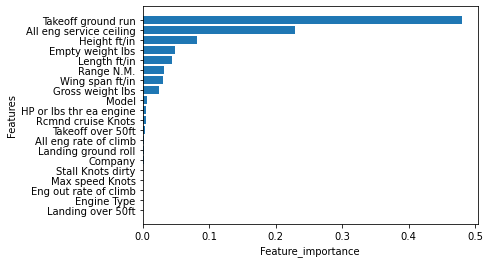

In [80]:
plot_features(x_train.columns,model.feature_importances_)